In [36]:
!pip3 install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [39]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [17]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 10.0 MB/s eta 0:00:0000:010:01m

[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install tensorflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 9.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 9.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

Loading the dataset

In [22]:
google = pd.read_csv('/Users/divyagosula/Downloads/GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'], index_col='Date')
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [23]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [24]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


Preprocessing

In [25]:
#checking for missing values
missing_values = google.isnull().any().any()
print(missing_values)

False


In [26]:
#calculating daily retunrn and daily log return
google['Daily_Return'] = google['Close'].pct_change()
google['Log_Return'] = np.log(google['Close'] / google['Close'].shift(1))
google.head()


,Open,High,Low,Close,Volume,Name,Daily_Return,Log_Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,0.023000,0.022739
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,0.013507,0.013417
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,0.031924,0.031425
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,0.002660,0.002657


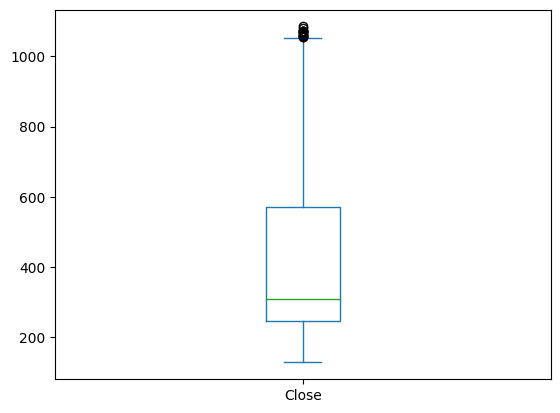

In [27]:
google['Close'].plot(kind='box')
plt.show()

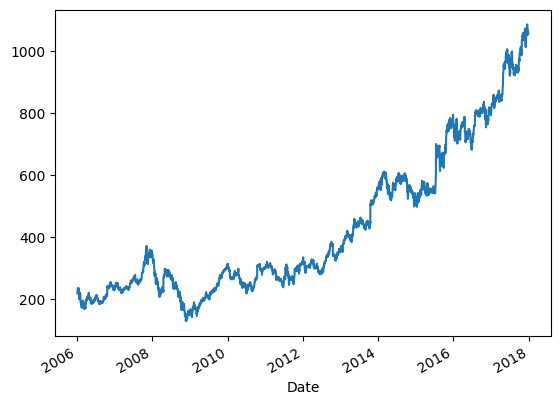

In [28]:
google['Close'].plot()
plt.show()


In [29]:
Q1 = google['Close'].quantile(0.25)
Q3 = google['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = google[(google['Close'] < (Q1 - 1.5 * IQR)) | (google['Close'] > (Q3 + 1.5 * IQR))]
print(outliers)
#removing the outliers
google_cleaned = google[(google['Close'] >= Q1 - 1.5 * IQR) & (google['Close'] <= Q3 + 1.5 * IQR)]


               Open     High      Low    Close   Volume   Name  Daily_Return   
Date                                                                           
2017-11-08  1050.05  1062.69  1047.05  1058.29  1214600  GOOGL      0.005606  \
2017-11-24  1054.39  1060.07  1051.92  1056.52   825369  GOOGL      0.004373   
2017-11-27  1058.57  1073.04  1054.77  1072.01  1771491  GOOGL      0.014661   
2017-11-28  1073.99  1080.00  1054.54  1063.29  1821171  GOOGL     -0.008134   
2017-12-14  1055.49  1067.08  1053.60  1057.47  1548139  GOOGL      0.005783   
2017-12-15  1063.78  1075.25  1060.09  1072.00  3187985  GOOGL      0.013740   
2017-12-18  1076.45  1086.49  1070.37  1085.09  1514601  GOOGL      0.012211   
2017-12-19  1083.02  1084.98  1072.27  1079.78  1317519  GOOGL     -0.004894   
2017-12-20  1080.92  1081.24  1068.60  1073.56  1436391  GOOGL     -0.005760   
2017-12-21  1075.39  1077.52  1069.00  1070.85  1282025  GOOGL     -0.002524   
2017-12-22  1070.00  1071.72  1067.64  1

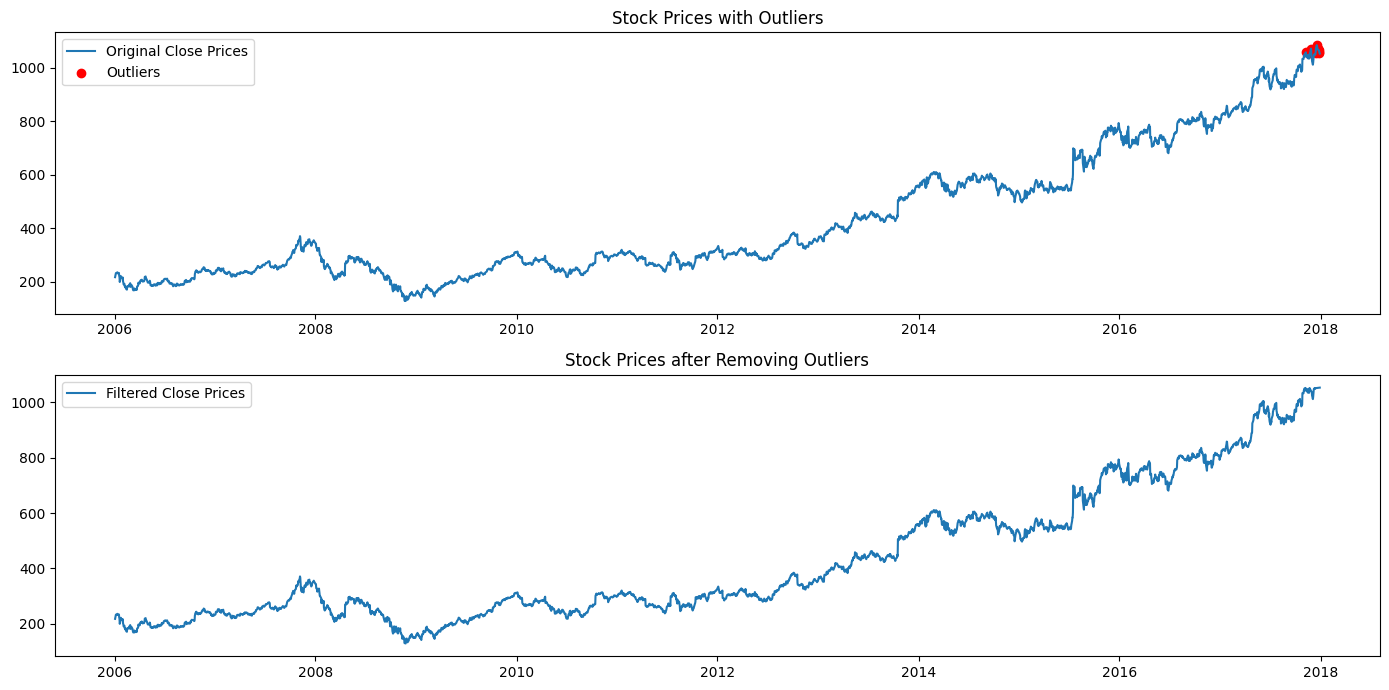

In [30]:
#before and after removing outliers
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(google.index, google['Close'], label='Original Close Prices')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')
plt.title('Stock Prices with Outliers')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(google_cleaned.index, google_cleaned['Close'], label='Filtered Close Prices')
plt.title('Stock Prices after Removing Outliers')
plt.legend()

plt.tight_layout()
plt.show()

Splitting of data

In [78]:
train_size = int(len(google_cleaned) * 0.7)
val_size = int(len(google_cleaned) * 0.2)
test_size = len(google_cleaned) - train_size - val_size

train, val, test = google_cleaned[:train_size], google_cleaned[train_size:train_size+val_size], google_cleaned[train_size+val_size:]


In [79]:
train = train['Close']
train = train.reset_index()
val = val['Close']
val = val.reset_index()
test = test['Close']
test = test.reset_index()


Normalizing the values

In [80]:
scaler = MinMaxScaler()
train.loc[:, ['Close']] = scaler.fit_transform(train[['Close']])
train = train.iloc[1:]
val.loc[:, ['Close']] = scaler.fit_transform(val[['Close']])
val = val.iloc[1:]
test.loc[:, ['Close']] = scaler.fit_transform(test[['Close']])
test = test.iloc[1:]
train.head()

,Date,Close
1,2006-01-04,0.195061
2,2006-01-05,0.201307
3,2006-01-06,0.216271
4,2006-01-09,0.217557
5,2006-01-10,0.220525


Considering close values for predicting future values, creating X_train and y_train as first 50 observations as X_train first data and 51st observation as y_train for that particular x_train and keep a loop.

In [81]:
dataset_train = train.Close.values
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(2102, 1)

In [82]:
X_train = []
y_train = []
time_step = 50
for i in range(time_step, len(dataset_train)):
    X_train.append(dataset_train[i-time_step:i,0])
    y_train.append(dataset_train[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [84]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

Creating RNN model 

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 5.0977e-04 - loss: 0.3864
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 3.9917e-04 - loss: 0.1898
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 9.4531e-05 - loss: 0.1059
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0024 - loss: 0.0775
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.9162e-04 - loss: 0.0566
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0014 - loss: 0.0367
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 9.1698e-04 - loss: 0.0313
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 7.5518e-04 - loss: 0.0255
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0013 - loss: 0.0206
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 2.5736e-04 - loss: 0.0182
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 6.9500e-04 - loss: 0.0166
Epoch 12/50
65/65 ━━━━━━━━━━━━━

In [87]:
history.history["loss"]

[0.3134230375289917,
 0.16234497725963593,
 0.09757504612207413,
 0.07216840982437134,
 0.05256791412830353,
 0.037534136325120926,
 0.02913535013794899,
 0.024537062272429466,
 0.01934918574988842,
 0.01714729145169258,
 0.01509970985352993,
 0.012116256169974804,
 0.010811296291649342,
 0.009546421468257904,
 0.007578686345368624,
 0.006912557873874903,
 0.006917713675647974,
 0.005996898282319307,
 0.00594558147713542,
 0.004739910364151001,
 0.004657589364796877,
 0.004446719773113728,
 0.004198708105832338,
 0.003869405249133706,
 0.003506334964185953,
 0.0031347216572612524,
 0.003167978022247553,
 0.0029849852435290813,
 0.0026407616678625345,
 0.0027938855346292257,
 0.0027046557515859604,
 0.002638093428686261,
 0.002369471825659275,
 0.002477414207533002,
 0.0025616975035518408,
 0.002425511833280325,
 0.0019254360813647509,
 0.0020320811308920383,
 0.0019550607539713383,
 0.002056089462712407,
 0.0018419919069856405,
 0.0017961333505809307,
 0.0018757370999082923,
 0.0019339

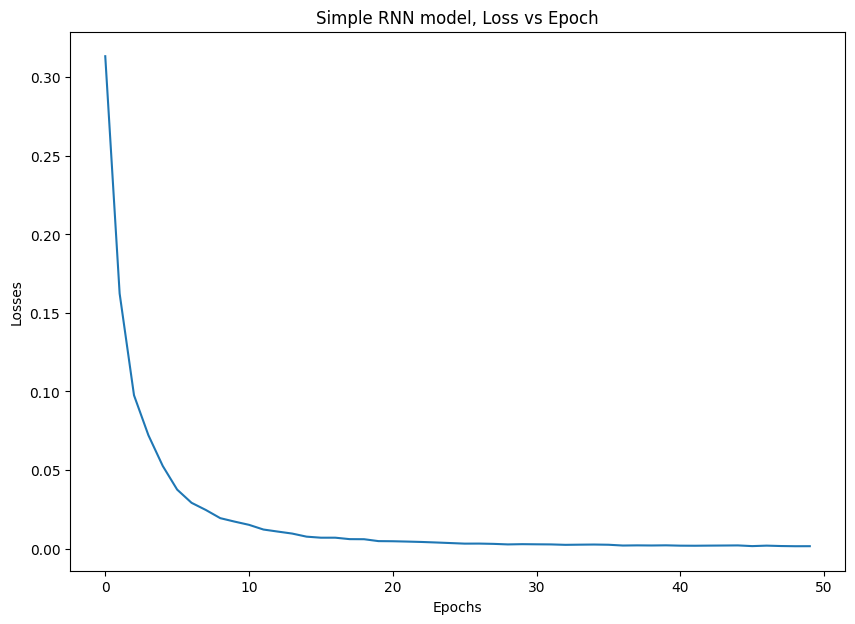

In [88]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

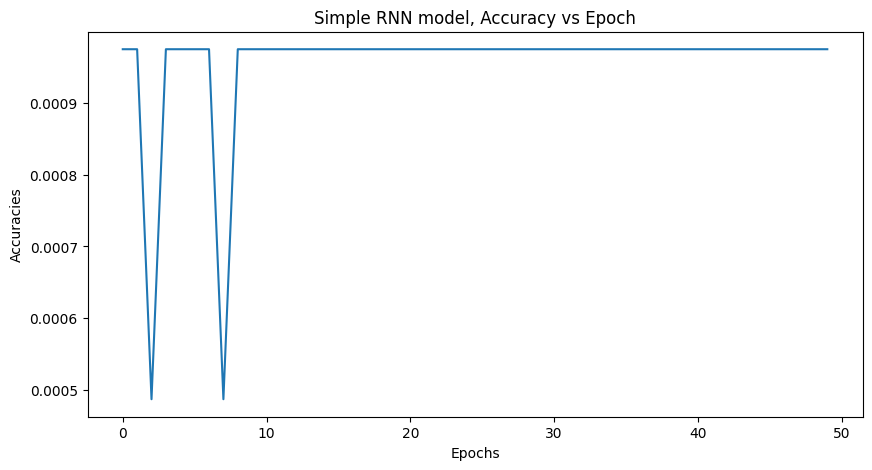

In [89]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [91]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(2052, 1)

In [92]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(2052, 1)

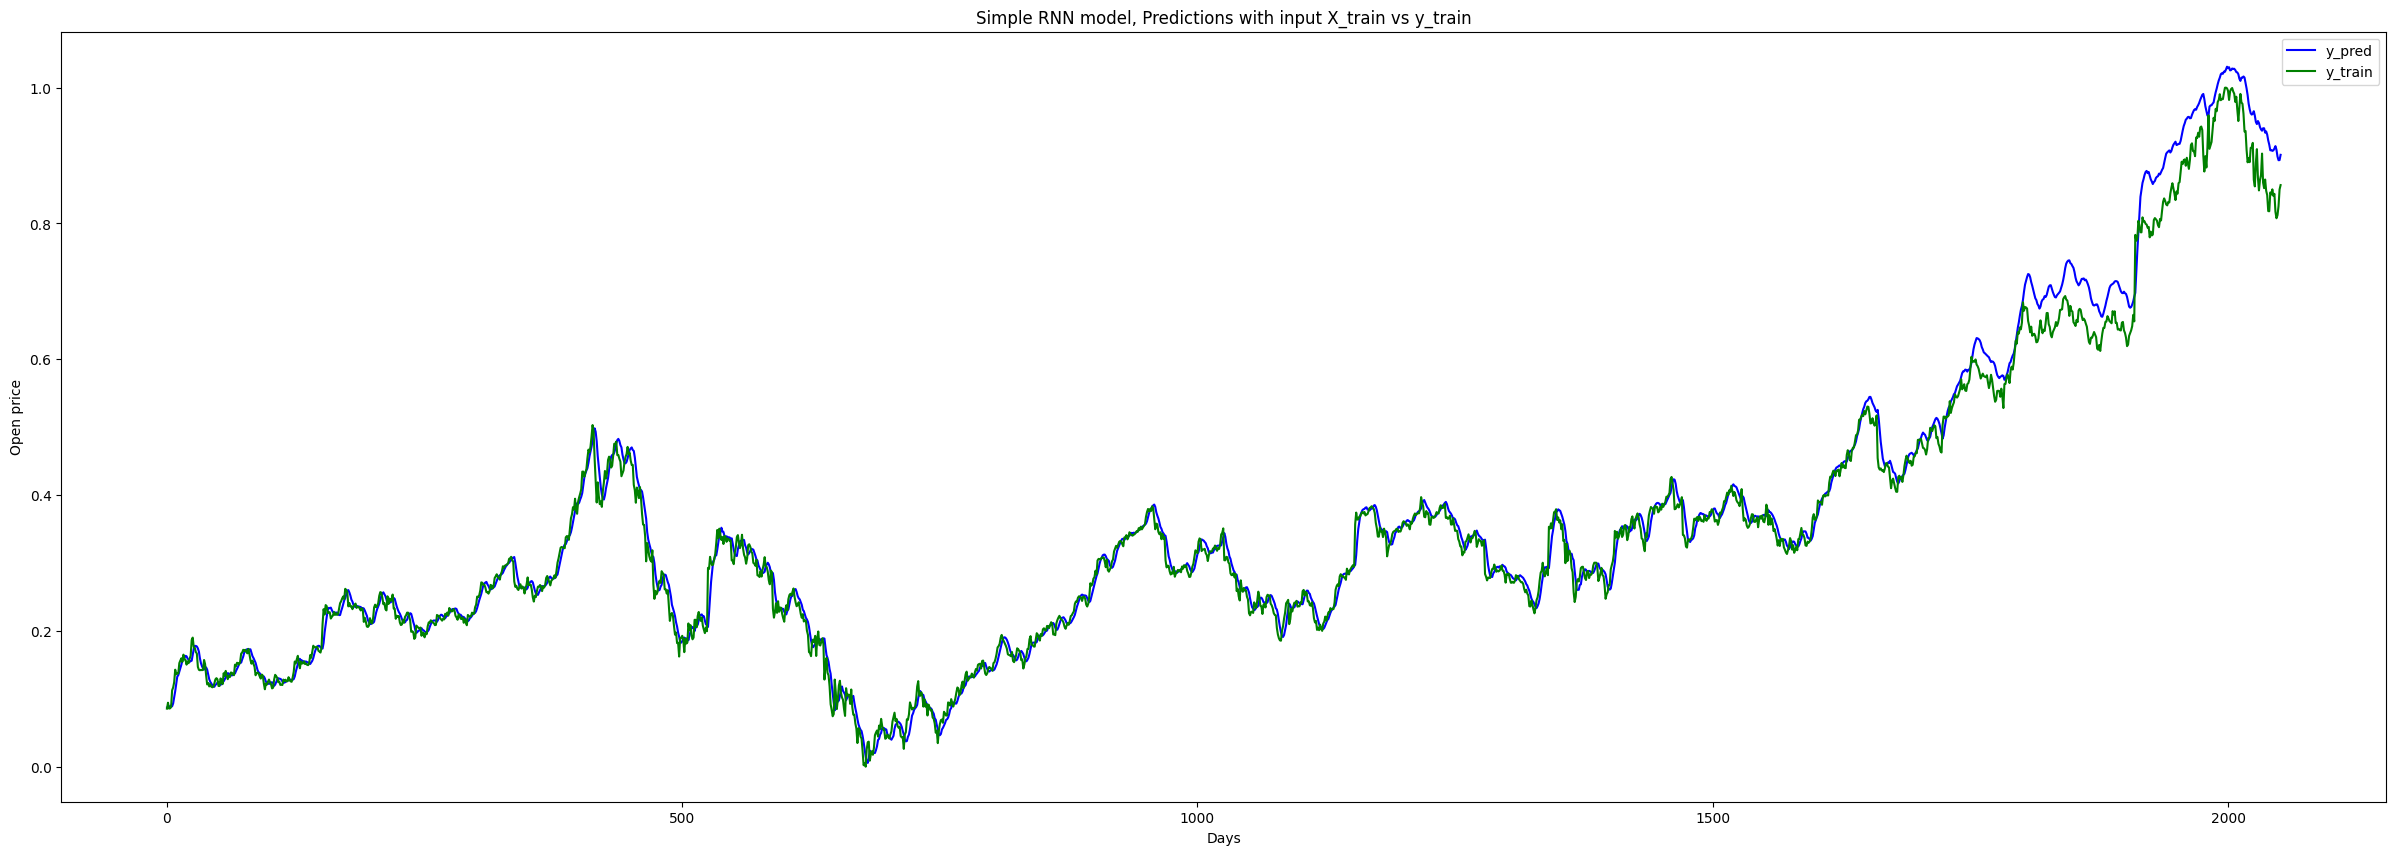

In [93]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

#creating and preparing validation dataset

In [94]:
dataset_val = val.Close.values
dataset_val = np.reshape(dataset_val, (-1,1))
dataset_val.shape

(600, 1)

In [95]:
X_val = []
y_val = []
time_step = 50
for i in range(time_step, len(dataset_val)):
    X_val.append(dataset_val[i-time_step:i,0])
    y_val.append(dataset_val[i,0])

X_val, y_val = np.array(X_val), np.array(y_val)

In [97]:
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))
print(X_val.shape, y_val.shape)

(550, 50, 1) (550, 1)


In [98]:
y_pred_of_val = regressor.predict(X_val)
# scaling back from 0-1 to original
y_pred_of_val = scaler.inverse_transform(y_pred_of_val) 
print("Shape of y_pred_of_val :",y_pred_of_val.shape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of y_pred_of_val : (550, 1)


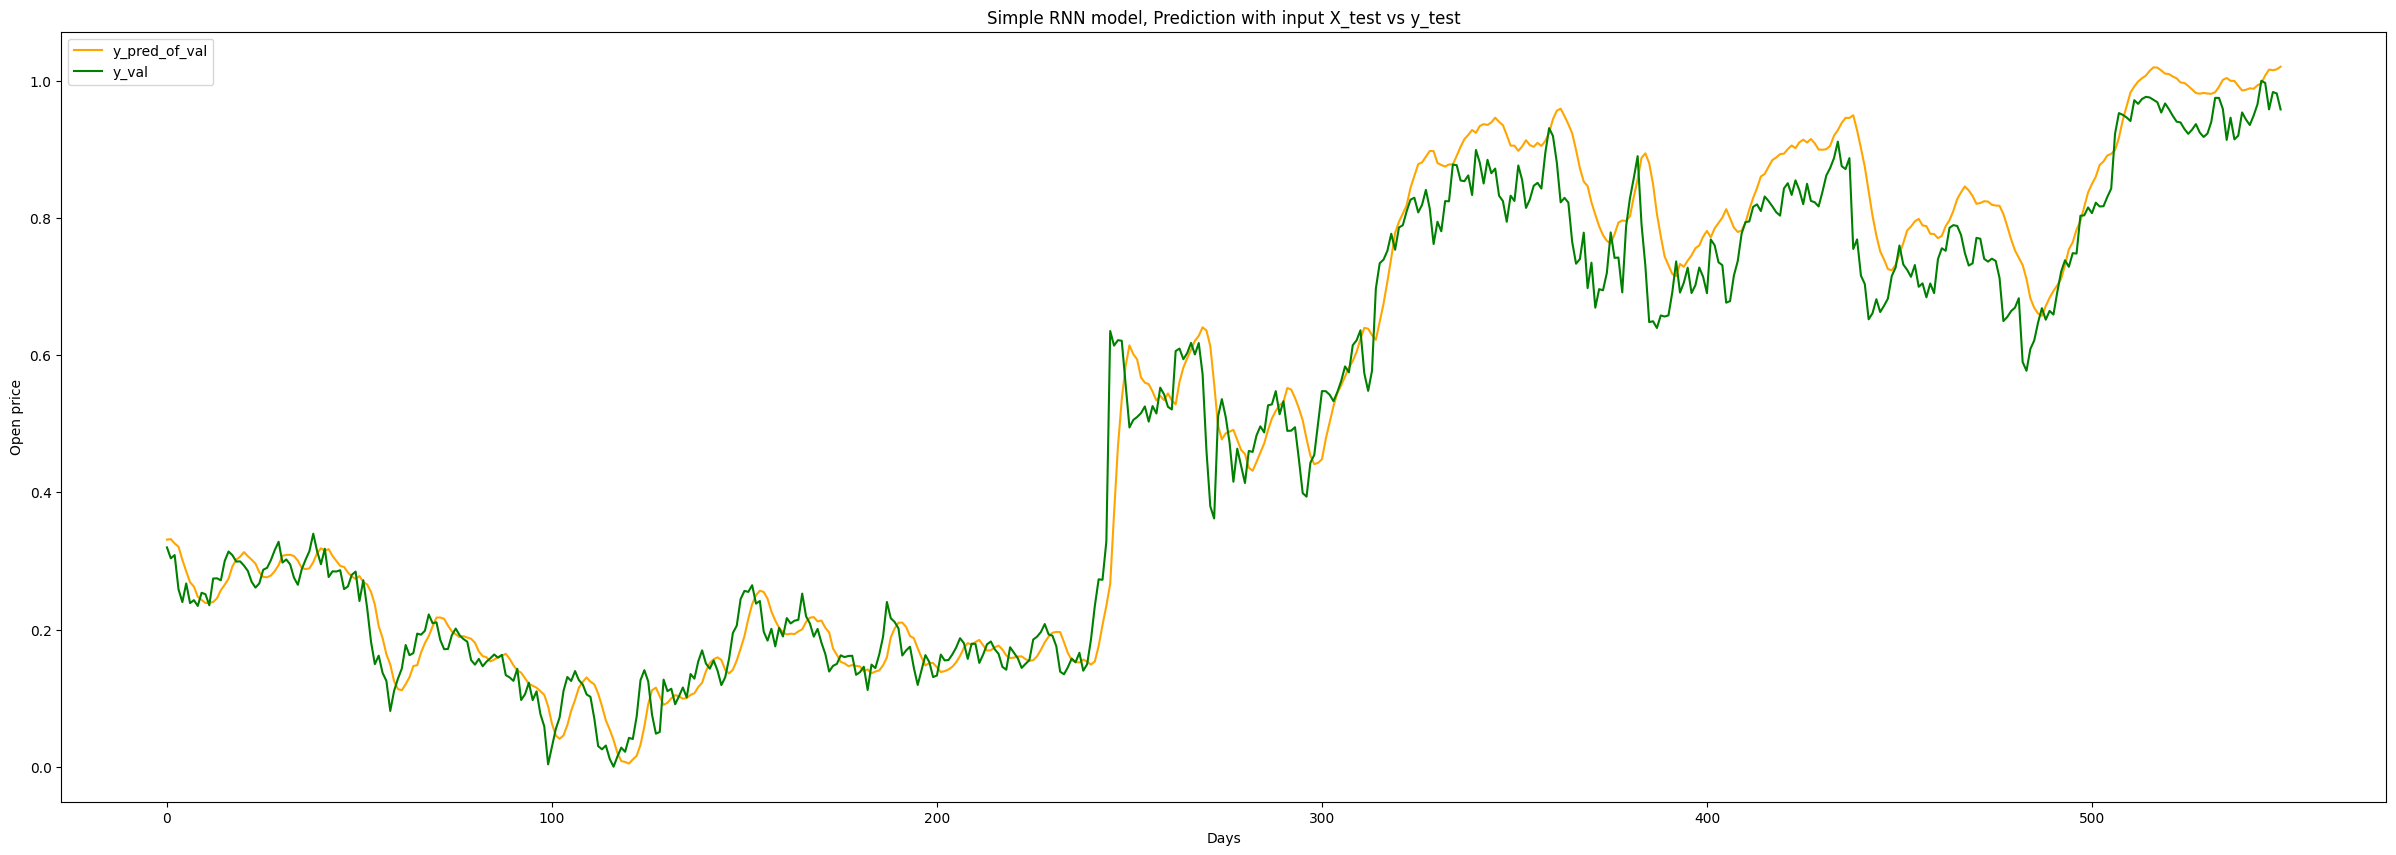

In [99]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_val, label = "y_pred_of_val", c = "orange")
plt.plot(scaler.inverse_transform(y_val), label = "y_val", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

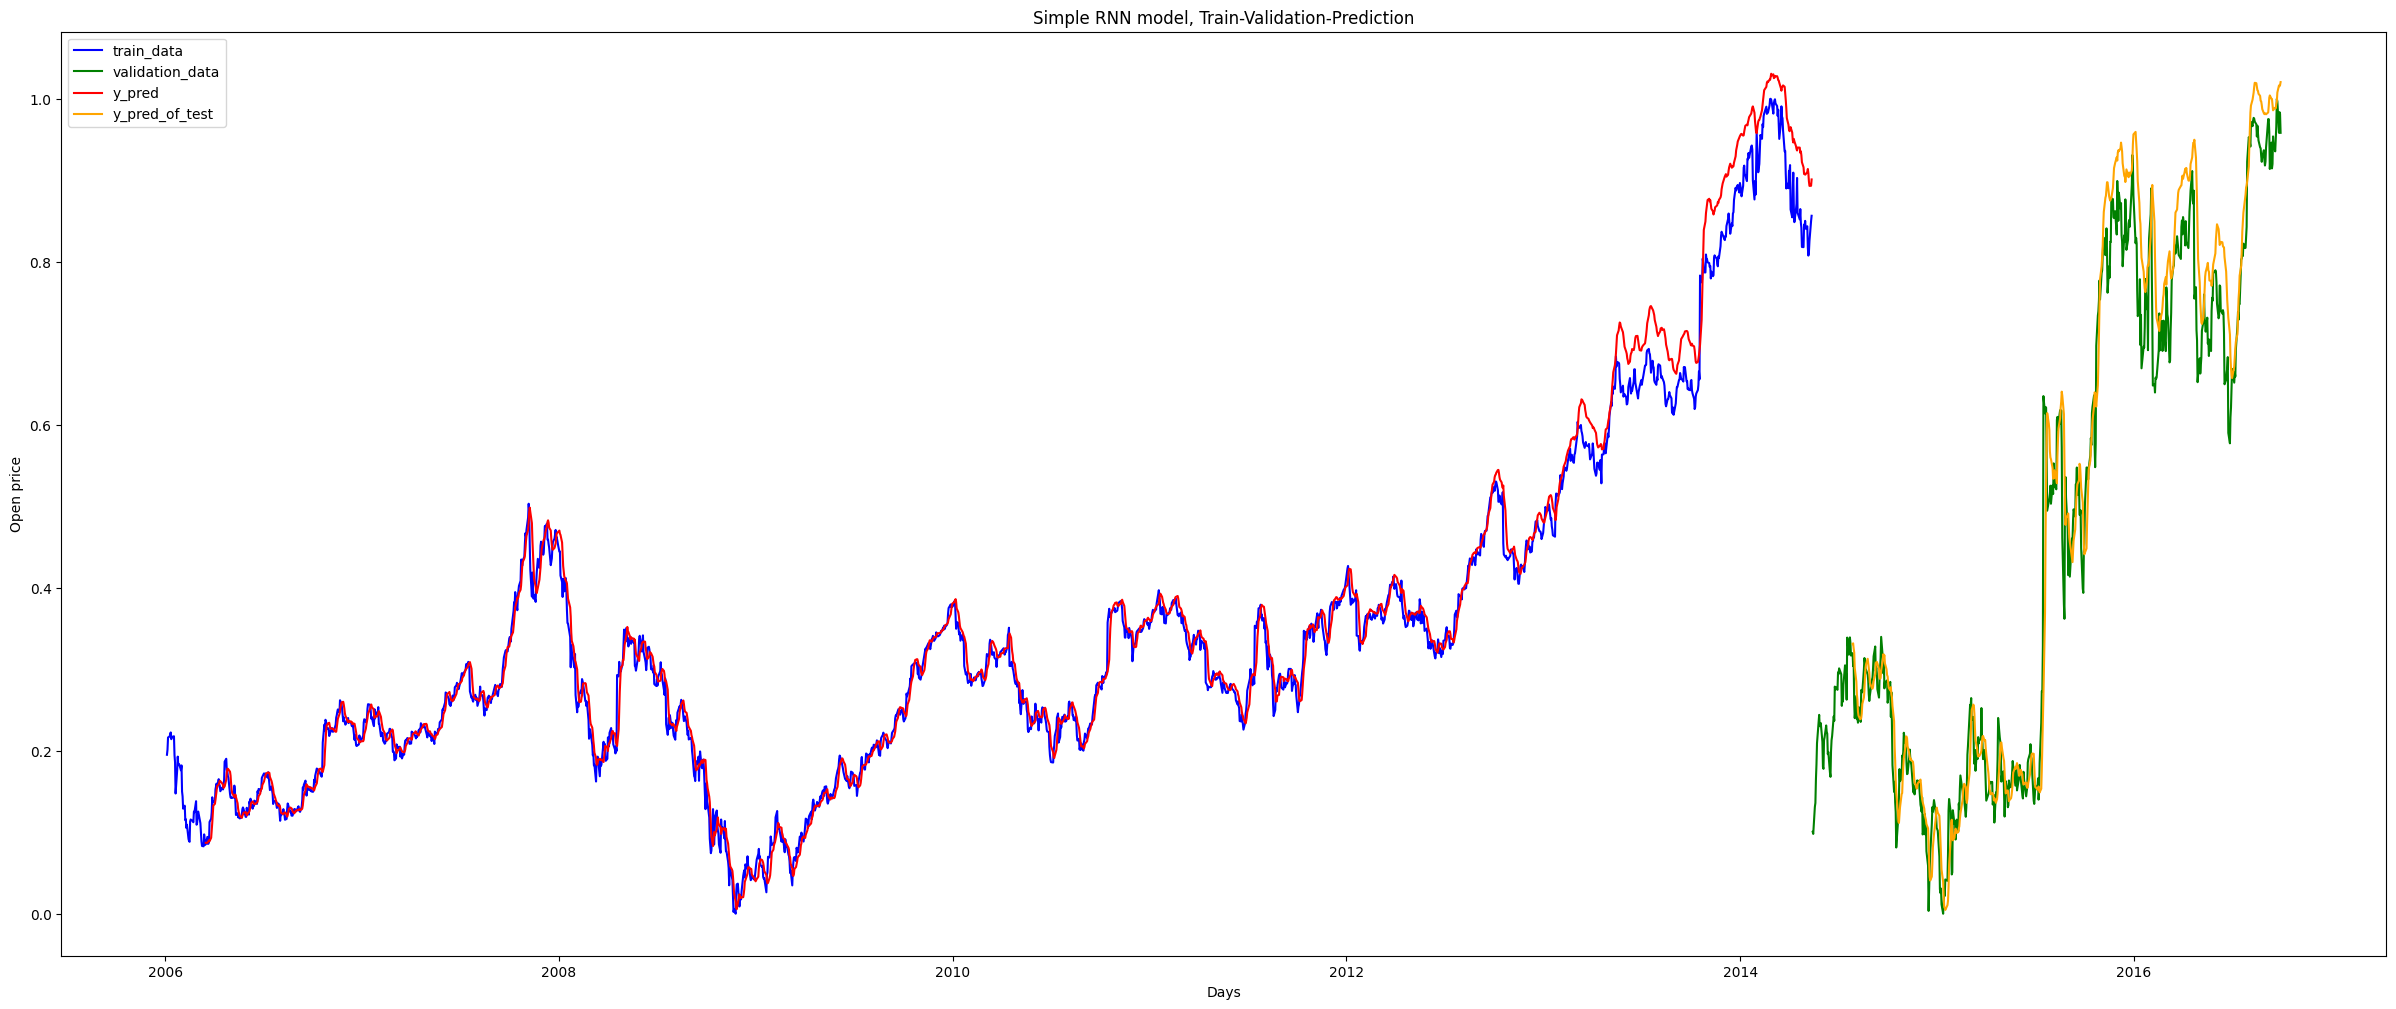

In [101]:
plt.subplots(figsize =(30,12))
plt.plot(train.Date, train.Close, label = "train_data", color = "b")
plt.plot(val.Date, val.Close, label = "validation_data", color = "g")
plt.plot(train.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(val.Date.iloc[time_step:], y_pred_of_val, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

Future Price Prediction


In [102]:
google.iloc[-1]

Open             1055.49
High             1058.05
Low               1052.7
Close             1053.4
Volume           1180340
Name               GOOGL
Daily_Return   -0.002415
Log_Return     -0.002418
Name: 2017-12-29 00:00:00, dtype: object

In [103]:
X_input = google.iloc[-time_step:].Close.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.16373682],
        [0.19618282],
        [0.        ],
        [0.02963335],
        [0.0594676 ],
        [0.0590658 ],
        [0.48347564],
        [0.47805123],
        [0.47714716],
        [0.57317931],
        [0.57689603],
        [0.64741336],
        [0.57398292],
        [0.67152185],
        [0.73078855],
        [0.62461075],
        [0.58874937],
        [0.55911602],
        [0.56353591],
        [0.5109995 ],
        [0.63214465],
        [0.50577599],
        [0.49342039],
        [0.65052737],
        [0.6668006 ],
        [0.71300854],
        [0.86860874],
        [0.78101457],
        [0.52074335],
        [0.50858865],
        [0.39708689],
        [0.26449021],
        [0.34213963],
        [0.4739327 ],
        [0.59296836],
        [0.64128579],
        [0.66730286],
        [0.63515821],
        [0.66147664],
        [0.72255148],
        [0.86850829],
        [1.        ],
        [0.94665997],
        [0.8841788 ],
        [0.8569563 ],
        [0

In [106]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
print("Simple RNN, Close price prediction for 2017-12-29     :", simple_RNN_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Simple RNN, Close price prediction for 2017-12-29     : 1067.2412
